<a href="https://colab.research.google.com/github/yohanesnuwara/geodatascience/blob/main/North_Sea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Accessing Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


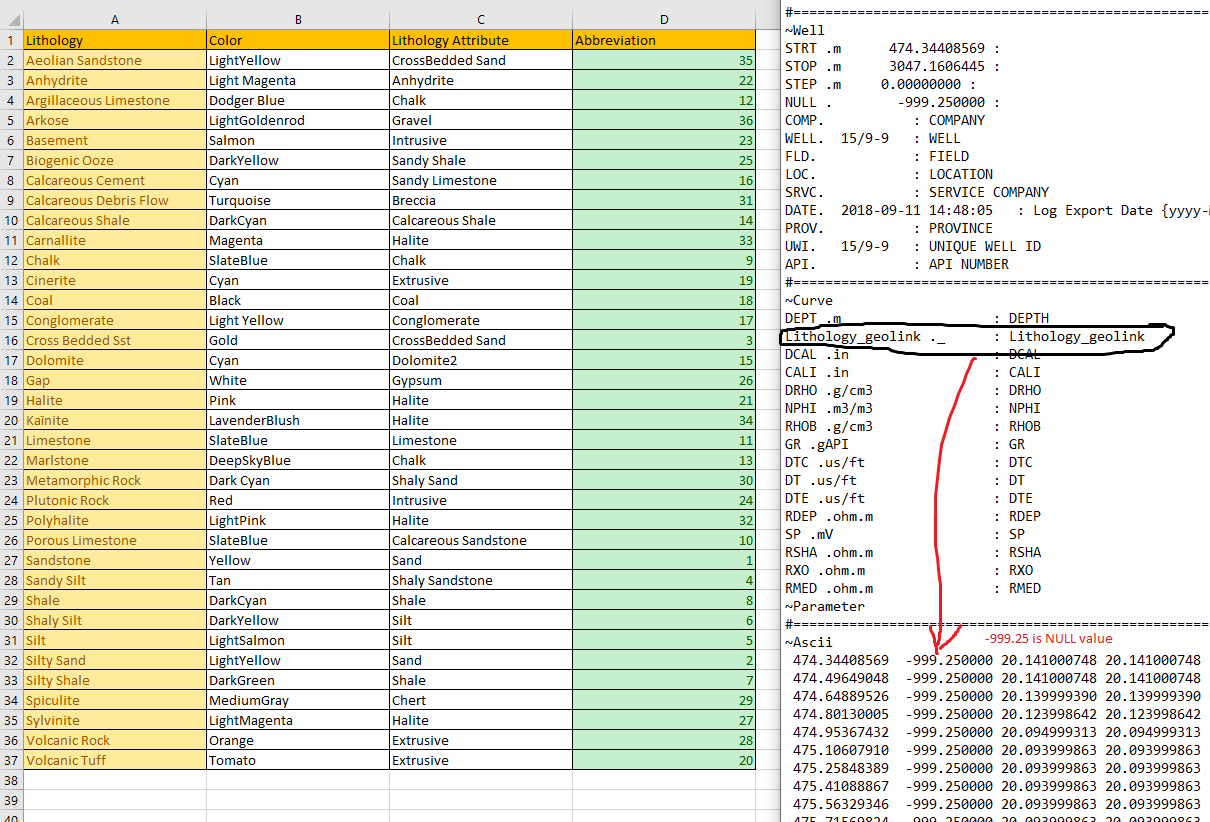

In [3]:
from PIL import Image

code = Image.open("/content/drive/My Drive/Public geoscience Data/GEOLINK North sea wells with Lithology interpretation/Lithology code in the well.png")
code

In [ ]:
facies_labels = ['UNKNOWN', 'SILTSST', 'CBSST', 'SANDSIL', 'SIL', 'SHSIL', 'SILSH', 'SH', 'CHALK', 'PORLST', 'LST', 'ARGILST',
                 'MARL', 'CALCSH', 'DOLO', 'CALCEMENT', 'CONGLO', 'COAL', 'CINE', 'VOLTUFF', 'HAL', 'ANHDR', 'BASE',
                 'PLUTO', 'BIOOZE', 'GYP', 'SYLV', 'VOLC', 'SPICU', 'META', 'CALCDEBR', 'POLYHAL', 'CARNA', 'KAI', 'AEOSST', 'ARKO']
a = np.arange(0,37)
len(facies_labels)

36

In [ ]:
!unzip '/content/drive/My Drive/Public geoscience Data/GEOLINK North sea wells with Lithology interpretation/GEOLINK_Lithology and wells NORTH SEA.zip' -d '/content/GEOLINK North Sea'

In [ ]:
ls '/content/GEOLINK North Sea'

In [ ]:
ls -1 /content/'GEOLINK North Sea'/*.las | wc -l

223


## Loading

In [ ]:
import glob
import os

file_path = "/content/GEOLINK North Sea"
read_files = sorted(glob.glob(os.path.join(file_path, "*.csv")))
read_files

[]

In [ ]:
well_names = []

for files in read_files:
  files = os.path.splitext(os.path.basename(files))[0]
  well_names.append(files)

names = np.array(well_names)

In [ ]:
wells_id = np.arange(len(well_names))
wells_id

In [ ]:
!pip install lasio

Reading 233 wells takes ~7 minutes

In [ ]:
import lasio

lases = []

for files in read_files:
    las = lasio.read(files)
    lases.append(las)

In [ ]:
id = 50
print('Well name:', names[id])
print((lases[id]).keys())
print((lases[id]).curves)

Well name: 25_10-8 A
['DEPT', 'LITHOLOGY_GEOLINK', 'NPHI', 'RHOB', 'GR', 'RDEP', 'RSHA']
Mnemonic           Unit   Value  Description        
--------           ----   -----  -----------        
DEPT               m             DEPTH              
LITHOLOGY_GEOLINK  _             Lithology_geolink  
NPHI               m3/m3         NPHI               
RHOB               g/cm3         RHOB               
GR                 gAPI          GR                 
RDEP               ohm.m         RDEP               
RSHA               ohm.m         RSHA               


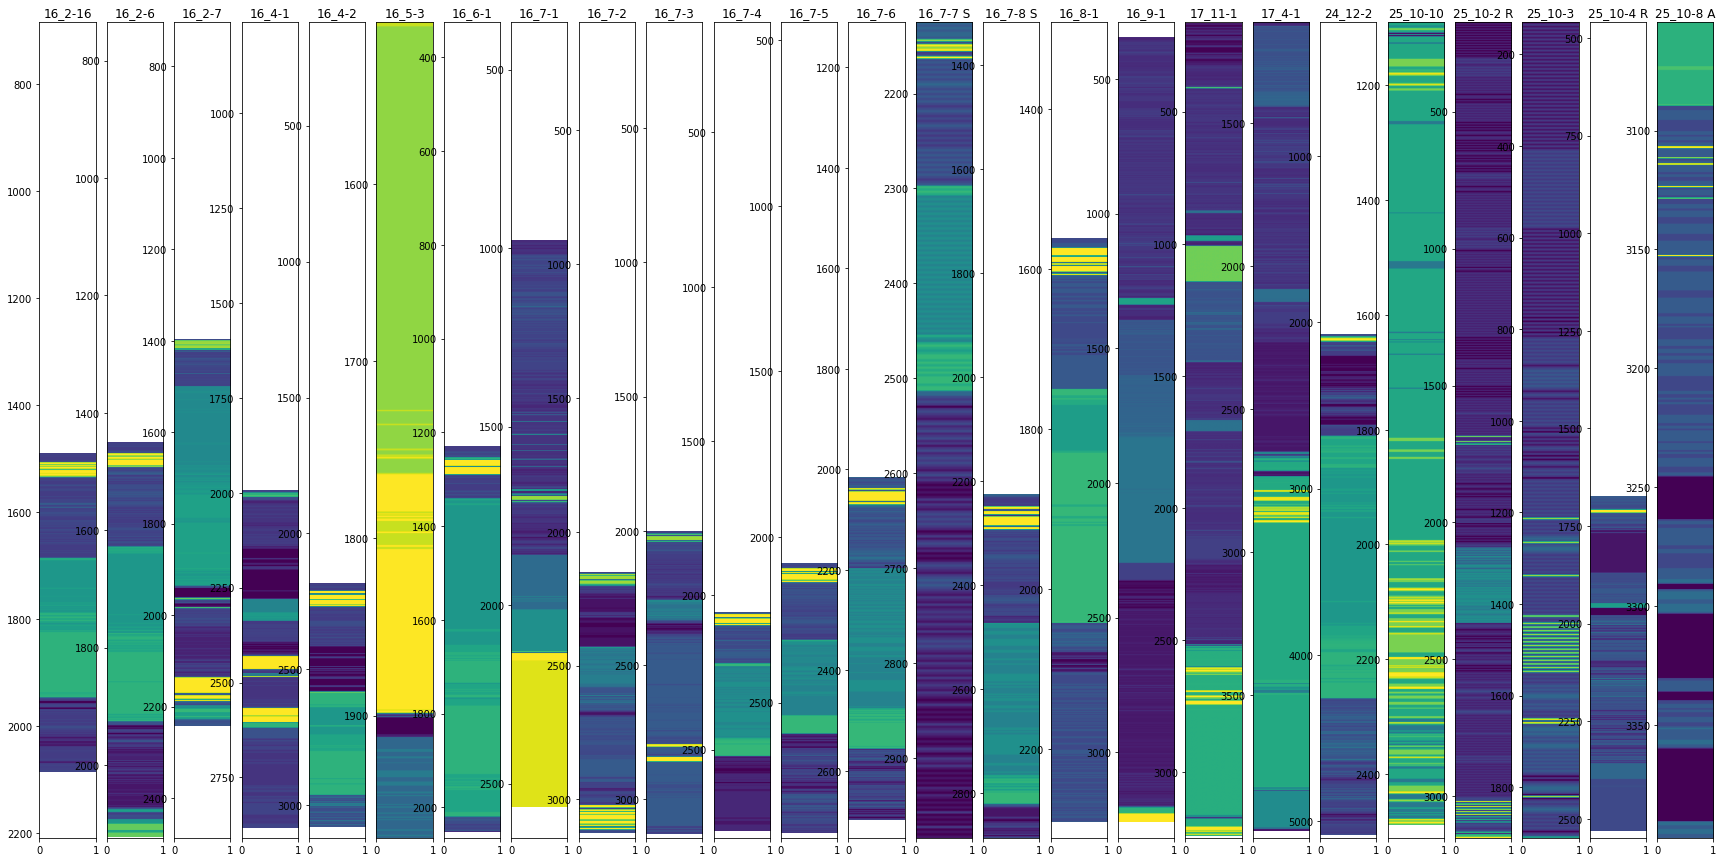

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=25, figsize=(30,15))

lower, upper = 26, 51

for i in range(lower,upper):
  well_a = lases[i]

  depth = well_a['DEPT']
  lith = well_a['LITHOLOGY_GEOLINK']

  F = np.vstack((lith,lith)).T
  ax[i-lower].imshow(F, aspect='auto', extent=[0,1,max(depth), min(depth)])
  ax[i-lower].set_title(names[i])

plt.show()

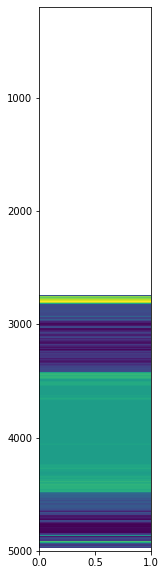

In [ ]:
well_a = lases[0]

depth = well_a['DEPT']
lith = well_a['LITHOLOGY_GEOLINK']

F = np.vstack((lith,lith)).T

plt.figure(figsize=(2,10))
# plt.imshow(F, aspect='auto', extent=[0,1,max(depth), min(depth)])
plt.imshow(F, aspect='auto', extent=[0,1,5000, 200])
plt.show()

In [ ]:
b = lases[0].df()
# b = b.reset_index()
b.iloc[11302:20100,:]

,LITHOLOGY_GEOLINK,CALI,DRHO,NPHI,RHOB,GR,DTC,DTE,RDEP,SP,RSHA,RXO,RMED
DEPT,,,,,,,,,,,,,
2215.917725,6.0,14.438001,0.010,0.447725,2.363,60.285748,134.253601,40252992.0,0.737006,50.570400,0.785088,NaN,0.785088
2216.070068,6.0,14.633000,0.006,0.432095,2.340,63.250000,129.101868,38724252.0,0.741000,50.820000,0.840000,NaN,0.840000
2216.222412,6.0,14.813001,0.006,0.410166,2.314,61.405998,122.476944,36726600.0,0.752000,50.820000,0.858000,NaN,0.858000
2216.375000,6.0,14.383001,-0.001,0.414143,2.293,62.561596,116.908607,34970676.0,0.739962,51.070000,0.857046,NaN,0.857046
2216.527344,6.0,14.202999,0.001,0.439923,2.275,61.691055,115.390953,34544376.0,0.715966,51.070602,0.886082,NaN,0.886082
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3555.970703,1.0,7.934000,-0.030,0.093260,2.250,15.629000,82.365044,24347768.0,36.581001,18.150000,42.869999,4.194,42.869999
3556.123047,1.0,7.926001,-0.025,0.098630,2.252,16.525999,83.211876,24651684.0,33.457001,19.261999,36.695999,5.466,36.695999
3556.275391,1.0,7.934000,-0.027,0.111820,2.256,19.128000,84.122856,24893506.0,33.282001,19.952999,32.240002,5.830,32.240002


In [ ]:
# convert las to dataframe
df = (lases[id]).df()

# print NaN values
print('NaN values:')
print(df.isnull().sum())

# explore the first 10 data
df.head(10)

NaN values:
LITHOLOGY_GEOLINK     4306
CALI                    31
BS                    7483
DRHO                  3778
NPHI                  7441
RHOB                   135
GR                       0
DTC                    135
DTE                    135
RDEP                   152
SP                       0
RSHA                   501
RMIC                 11839
RMED                   501
dtype: int64


,LITHOLOGY_GEOLINK,CALI,BS,DRHO,NPHI,RHOB,GR,DTC,DTE,RDEP,SP,RSHA,RMIC,RMED
DEPT,,,,,,,,,,,,,,
349.625122,NaN,-5.026,NaN,NaN,NaN,1.0,15.339000,212.122681,206.224609,NaN,-328.756012,NaN,NaN,NaN
349.750092,NaN,-5.026,NaN,NaN,NaN,1.0,15.339000,212.110870,206.224609,NaN,-328.756012,NaN,NaN,NaN
349.875122,NaN,-5.026,NaN,NaN,NaN,1.0,15.339000,212.159836,206.224609,NaN,-328.756012,NaN,NaN,NaN
350.000122,NaN,-5.026,NaN,NaN,NaN,1.0,15.339000,212.160278,206.224609,NaN,-328.756012,NaN,NaN,NaN
350.125122,NaN,-5.026,NaN,NaN,NaN,1.0,15.339000,212.124649,206.224609,NaN,-328.756012,NaN,NaN,NaN
350.250122,NaN,-5.026,NaN,NaN,NaN,1.0,15.339000,212.102646,206.224609,NaN,-328.756012,NaN,NaN,NaN
350.375122,NaN,-5.026,NaN,NaN,NaN,1.0,15.339010,212.131851,206.224609,NaN,-328.756012,NaN,NaN,NaN
350.500122,NaN,-5.025,NaN,NaN,NaN,1.0,15.345477,212.166718,206.224609,NaN,-328.550995,NaN,NaN,NaN
350.625092,NaN,-5.025,NaN,NaN,NaN,1.0,15.624284,212.122757,206.224609,NaN,-326.351990,NaN,NaN,NaN


In [ ]:
df['LITHOLOGY_GEOLINK'] = df['LITHOLOGY_GEOLINK'].fillna(0)
df

,LITHOLOGY_GEOLINK,CALI,BS,DRHO,NPHI,RHOB,GR,DTC,DTE,RDEP,SP,RSHA,RMIC,RMED
DEPT,,,,,,,,,,,,,,
349.625122,0.0,-5.026,NaN,NaN,NaN,1.0,15.339000,212.122681,206.224609,NaN,-328.756012,NaN,NaN,NaN
349.750092,0.0,-5.026,NaN,NaN,NaN,1.0,15.339000,212.110870,206.224609,NaN,-328.756012,NaN,NaN,NaN
349.875122,0.0,-5.026,NaN,NaN,NaN,1.0,15.339000,212.159836,206.224609,NaN,-328.756012,NaN,NaN,NaN
350.000122,0.0,-5.026,NaN,NaN,NaN,1.0,15.339000,212.160278,206.224609,NaN,-328.756012,NaN,NaN,NaN
350.125122,0.0,-5.026,NaN,NaN,NaN,1.0,15.339000,212.124649,206.224609,NaN,-328.756012,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2378.999756,0.0,9.088,8.5,NaN,NaN,NaN,77.894997,NaN,NaN,1.736,31.712997,2.308,NaN,2.308
2379.124756,0.0,9.088,8.5,NaN,NaN,NaN,77.894997,NaN,NaN,1.736,31.712997,2.309,NaN,2.309
2379.249756,0.0,9.088,8.5,NaN,NaN,NaN,77.894997,NaN,NaN,1.736,31.712997,2.310,NaN,2.310


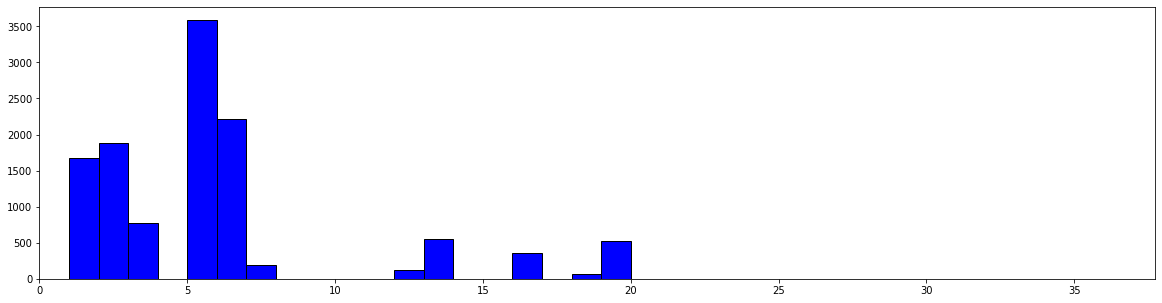

In [ ]:
bins = np.arange(1, 37)
plt.figure(figsize=(20,5))
plt.hist(df['LITHOLOGY_GEOLINK'], bins=bins, color='blue', edgecolor='black', linewidth=1)
plt.xlim(xmin=0)
plt.show()

In [ ]:
features = ['NPHI', 'RHOB', 'GR', 'DTC']
feature_vectors = df[features]
facies_labels = df['LITHOLOGY_GEOLINK']

array([0., 0., 0., ..., 0., 0., 0.])

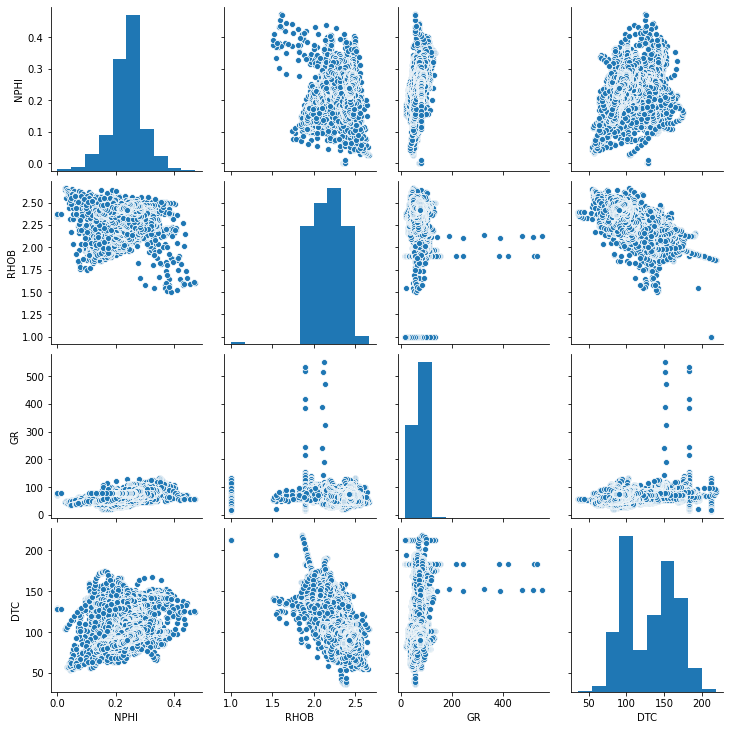

In [ ]:
import seaborn as sns

sns.pairplot(feature_vectors)

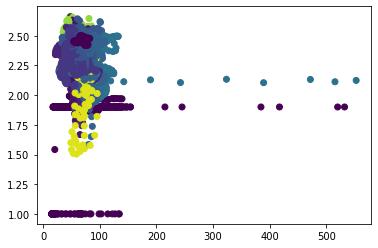

In [ ]:
plt.scatter(df['GR'], df['RHOB'], c=facies_labels)